# Arrhenius Optimization

The Arrhenius equation tells us that the rate of reaction for simple chemical reactions is given by k(T) = Ae^{-E_a/RT}. Reacting faster is usually valuable, but of course higher T comes with a high energy cost. One sensible tradeoff to make is to maximise k(T)/(T-298), which allows us to get the most "bang" for our "buck" in terms of getting fast yield for relatively low energy cost.

This notebook aims to find the ideal temperature to heat our reactants to in order to maximise (T)/(T-298) given known values for E_a and A (R is a physical constant which does not change). 

More on Arrhenius: https://en.wikipedia.org/wiki/Arrhenius_equation

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt

## Function Implementation & Parameters

In [2]:
R = 8.314 
E_a = 15000
A = 10 ** 10
roomT = 298
minT = 320
maxT = 2000

#Given our constants, this gives us reaction rate, k(T)
def reactionProbability(x, frequencyFactor = A, activationEnergy = E_a):
    T = x[0]
    return(frequencyFactor * np.exp(-activationEnergy / (R * T)))

#Reaction rate k(T) versus temperature increase (T - roomT)
def efficiencyFunction(x, frequencyFactor = A, activationEnergy = E_a, roomTemperature = roomT):
    T = x[0]
    return(reactionProbability(x, frequencyFactor, activationEnergy) / (R * (T - roomTemperature)))

#Same as efficiencyFunction, but with a punishment for being outside the range [minT, maxT]
def feasibleObjective(x):
    feasibility = 1
    if x[0] < minT or x[0] > maxT:
        feasibility = 0
    return(feasibility * efficiencyFunction(x))

## Plotting

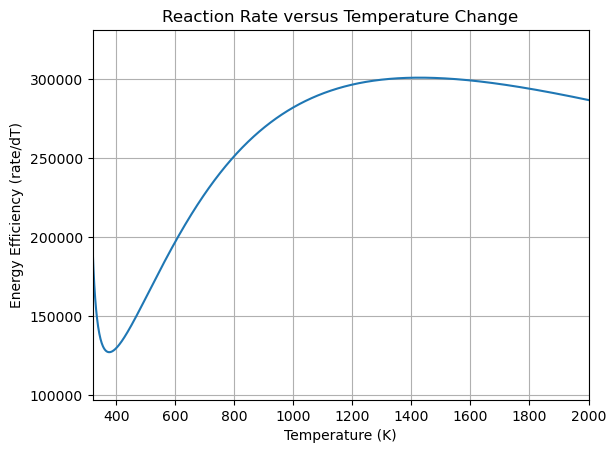

In [3]:
plt.title("Reaction Rate versus Temperature Change")
xData = [[x] for x in np.arange(minT, maxT, 1)]
yData = [efficiencyFunction(x) for x in xData]
plt.xlabel("Temperature (K)")
plt.ylabel("Energy Efficiency (rate/dT)")
plt.grid(True)
plt.xlim(minT, maxT)
plt.ylim(min(yData) - 0.1 * max(yData), max(yData) + 0.1 * max(yData))
plt.plot(xData, yData)

## Optimization with Simulated Annealing

In [7]:
class SimulatedAnnealing:
    def __init__(
        self,
        ranges
    ):
        self.ranges = ranges
    
    def optimize(self, objectiveFunction, numIterations = 10000, standardDeviation = 0.1, coolingFactor = 0.9):
        currentX = [np.mean(x) for x in self.ranges]
        currentY = objectiveFunction(currentX)
        heat = 1
        for i in range(numIterations):
            heat = heat * coolingFactor
            newX = [r.gauss(x, standardDeviation) for x in currentX]
            newY = objectiveFunction(newX)
            if newY > currentY:
                currentY = newY
                currentX = newX
            else:
                prob = r.uniform(0, 1)
                if prob > np.e ** -(currentY - newY)/(heat + (10 ** -10)):
                    currentY = newY
                    currentX = newX
        
        return(currentX)
sa = SimulatedAnnealing([[minT, maxT]])
print(sa.optimize(feasibleObjective))

[np.float64(1427.5680976475876)]
